http://qutip.org/docs/4.1/guide/guide-bloch.html

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

from qutip import *
from qutip.ipynbtools import plot_animation

In [2]:
import numpy as np

In [3]:
import cmath
import math
_EPS = 1e-10  # global variable used to chop very small numbers to zero

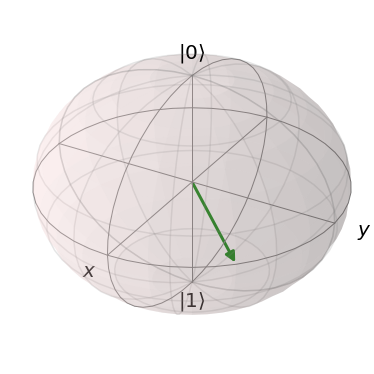

In [4]:
b = Bloch()
theta = np.pi/2     # qubit angle from sigma_z axis (toward sigma_x axis)
phi = np.pi/4
vec = [np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)]
b.add_vectors(vec)
b.show()

In [5]:
def chop(U, abs_tol=_EPS):
    Real_U = U
    if np.abs(U) < abs_tol :
        Real_U = 0.0
    return Real_U

In [6]:
# This code is contributed by Alain Chancé
#
# A normalized pure state |𝜓> = 𝛼|0> + 𝛽|1> can be written |𝜓> = cos𝜃/2 |0> + 𝑒xp(𝑖𝜑) * sin𝜃/2 |1> 
# where, since the arccosine of a positive number is a first quadrant angle:
# 𝜃 = 2 * cos**(−1) |𝛼|, 𝜃/2 ∈ [0, 𝜋/2]
# 𝜑 = arg(𝛽) − arg(𝛼), 𝜑 ∈ [0,2𝜋]
# A pure state |𝜓> can be represented by a vector on the so-called Bloch sphere with the following coordinates: 
# 𝑟 = [sin𝜃 * cos𝜑, sin𝜃 * sin𝜑, cos𝜃]
#
def ToBloch(s):
    # Input: params (list): vector of complex amplitudes
    # Output: theta, phi, r
    
    num_qubits = math.log2(len(s))
    
    # Check if param is a power of 2
    if num_qubits == 0 or not num_qubits.is_integer():
        raise Exception("Desired statevector (complex vector) length not a positive power of 2.")
    
    num_qubits = int(num_qubits)
    
    if num_qubits > 1:
        raise Exception("Only one statevector is allowed as input.")
    
    # Check if probabilities (amplitudes squared) sum to 1
    if not math.isclose(sum(np.absolute(s) ** 2), 1.0, abs_tol=_EPS):
        raise Exception("Sum of amplitudes-squared does not equal one.")
    
    phi = cmath.phase(s[1]) - cmath.phase(s[0])
    phi = chop(phi)
        
    theta = chop(2*math.acos(abs(s[0])))
    
    r1 = chop(math.sin(theta)*math.cos(phi))
    r2 = chop(math.sin(theta)*math.sin(phi))
    r3 = chop(math.cos(theta))
    r = (r1,r2,r3)
    
    return theta, phi, r

Input statevector : [1.0, 0.0]
phi  0.0
theta:  0.0
r  (0.0, 0.0, 1.0)


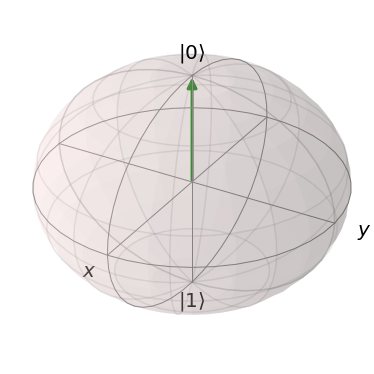

In [7]:
statevector = [1.0,0.0]
print("Input statevector :", statevector)
(theta, phi, r) = ToBloch(statevector)
print("phi ", phi)
print("theta: ", theta)
print("r ", r)

b = Bloch()
b.add_vectors(r)
b.show()

In [8]:
statevector = [0.0,1.0]

Input statevector : [0.0, 1.0]
phi  0.0
theta:  3.141592653589793
r  (0.0, 0.0, -1.0)


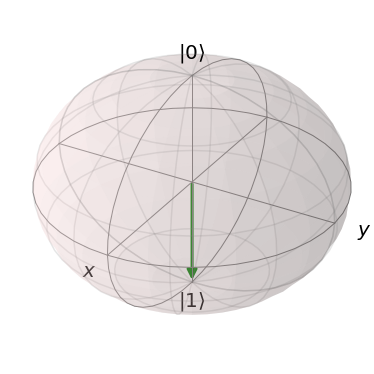

In [9]:
print("Input statevector :", statevector)
(theta, phi, r) = ToBloch(statevector)
print("phi ", phi)
print("theta: ", theta)
print("r ", r)

b = Bloch()
b.add_vectors(r)
b.show()

Input statevector : [0.7071067811865475, 0.7071067811865475]
phi  0.0
theta:  1.5707963267948968
r  (1.0, 0.0, 0.0)


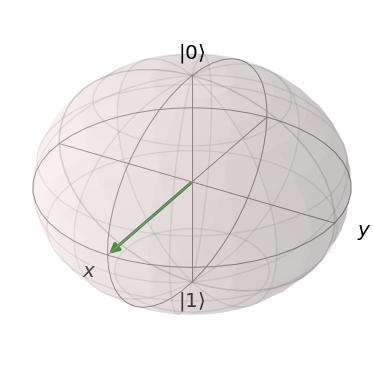

In [10]:
statevector = [1/math.sqrt(2),1/math.sqrt(2)]
print("Input statevector :", statevector)
(theta, phi, r) = ToBloch(statevector)
print("phi ", phi)
print("theta: ", theta)
print("r ", r)

b = Bloch()
b.add_vectors(r)
b.show()

Input statevector : [0.7071067811865475, 0.7071067811865475j]
phi  1.5707963267948966
theta:  1.5707963267948968
r  (0.0, 1.0, 0.0)


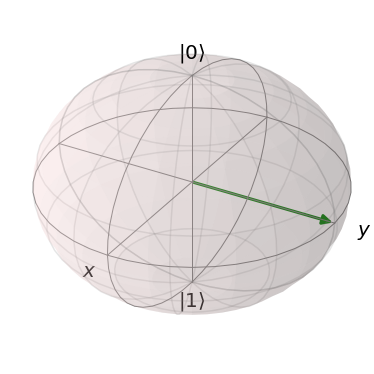

In [11]:
statevector = [1/math.sqrt(2),complex(0.0, 1/math.sqrt(2))]
print("Input statevector :", statevector)
(theta, phi, r) = ToBloch(statevector)
print("phi ", phi)
print("theta: ", theta)
print("r ", r)

b = Bloch()
b.add_vectors(r)
b.show()

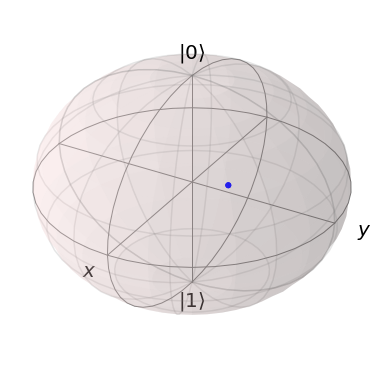

In [12]:
b = Bloch()
pnt = [1/np.sqrt(3),1/np.sqrt(3),1/np.sqrt(3)]
b.add_points(pnt)
b.show()

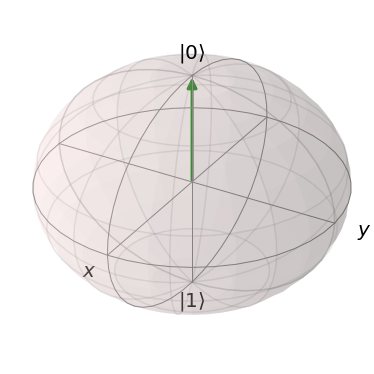

In [13]:
b = Bloch()
up = basis(2,0)
b.add_states(up)
b.show()

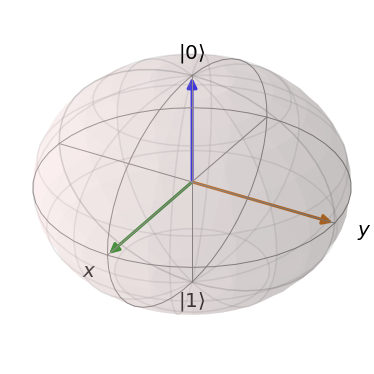

In [14]:
b = Bloch()
x = (basis(2,0)+(1+0j)*basis(2,1)).unit()
y = (basis(2,0)+(0+1j)*basis(2,1)).unit()
z = (basis(2,0)+(0+0j)*basis(2,1)).unit()
b.add_states([x,y,z])
b.show()

https://nbviewer.jupyter.org/github/qutip/qutip-notebooks/blob/master/examples/bloch-sphere-animation.ipynb

In [ ]:
def qubit_integrate(w, theta, gamma1, gamma2, psi0, tlist):
    # operators and the hamiltonian
    sx = sigmax(); sy = sigmay(); sz = sigmaz(); sm = sigmam()
    H = w * (np.cos(theta) * sz + np.sin(theta) * sx)
    # collapse operators
    c_op_list = []
    n_th = 0.5 # temperature
    rate = gamma1 * (n_th + 1)
    if rate > 0.0: c_op_list.append(np.sqrt(rate) * sm)
    rate = gamma1 * n_th
    if rate > 0.0: c_op_list.append(np.sqrt(rate) * sm.dag())
    rate = gamma2
    if rate > 0.0: c_op_list.append(np.sqrt(rate) * sz)


    # evolve and calculate expectation values
    output = mesolve(H, psi0, tlist, c_op_list, [sx, sy, sz])  
    return output

In [ ]:
w     = 1.0 * 2 * np.pi  # qubit angular frequency
theta = 0.2 * np.pi      # qubit angle from sigma_z axis (toward sigma_x axis)
gamma1 = 0.5             # qubit relaxation rate
gamma2 = 0.2             # qubit dephasing rate
# initial state
a = 1.0
psi0 = (a* basis(2,0) + (1-a)*basis(2,1))/(np.sqrt(a**2 + (1-a)**2))
tlist = np.linspace(0, 4, 150)

In [ ]:
result = qubit_integrate(w, theta, gamma1, gamma2, psi0, tlist)

In [ ]:
def plot_setup(result):    
    
    fig = plt.figure(figsize=(8,8))
    axes = Axes3D(fig, azim=-40,elev=30)

    return fig, axes

In [ ]:
sphere = None

def plot_result(result, n, fig=None, axes=None):

    global sphere
    
    if fig is None or axes is None:
        fig, axes = plot_setup(result)

    if not sphere:
        sphere = Bloch(axes=axes)
        sphere.vector_color = ['r']
        
    sphere.clear()
    sphere.add_vectors([np.sin(theta), 0, np.cos(theta)])
    sphere.add_points([result.expect[0][:n+1], result.expect[1][:n+1], result.expect[2][:n+1]], meth='l')
    sphere.make_sphere()

    return fig, axes

In [ ]:
plot_animation(plot_setup, plot_result, result)